In [17]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [18]:
#what does the data look like

train_df.iloc[:1,:]


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1


In [19]:
# what do disaster tweets looke like

disasters = train_df[train_df["target"]==1]
disasters.iloc[:2,:]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [20]:
#what do non disaster tweets look like
print ("non_disaster tweet")
non_disasters = train_df[train_df["target"]==0]
non_disasters.iloc[:2,:]

non_disaster tweet


,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0


In [21]:
print('There are {} rows and {} columns in train dataset'.format(train_df.shape[0],train_df.shape[1]))
print('There are {} rows and {} columns in test dataset'.format(test_df.shape[0],test_df.shape[1]))

There are 7613 rows and 5 columns in train dataset
There are 3263 rows and 4 columns in test dataset


In [22]:
# how many disaster and non-disaster tweets there are in the material
dis_twts = train_df[train_df['target'] == 1].shape[0]
non_dis_twts = train_df[train_df['target'] == 0].shape[0]
print ("disaster tweets {} and non-disaster tweets {}".format(dis_twts, non_dis_twts))

disaster tweets 3271 and non-disaster tweets 4342


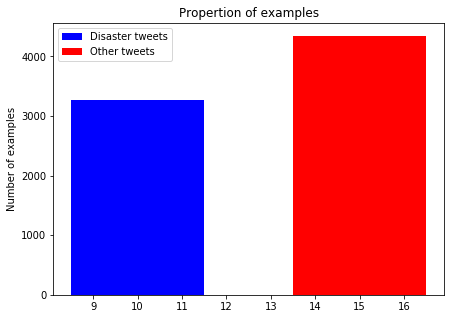

In [23]:
#visualize the amounts
# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,dis_twts,3, label="Disaster tweets", color='blue')
plt.bar(15,non_dis_twts,3, label="Other tweets", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [24]:
def lenni(text):    
    '''a function which returns the length of text'''
    return len(text)

train_df['length'] = train_df['text'].apply(lenni)

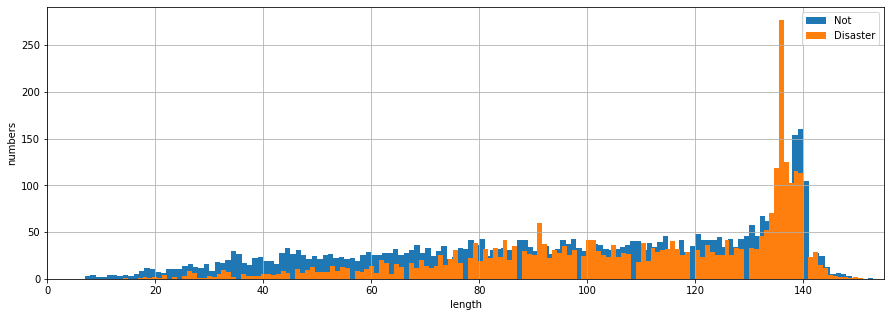

In [25]:
#very short tweets are non-diaster, disaster tweets tend to be longer
# but it is hard to see this from the figure as non-disaster tweets might be behind
plt.rcParams['figure.figsize'] = (15.0, 5.0)
bins = 150
plt.hist(train_df[train_df['target'] == 0]['length'],  bins=bins, label='Not')
plt.hist(train_df[train_df['target'] == 1]['length'],  bins=bins, label='Disaster')
plt.xlabel('length')
plt.ylabel('numbers')
plt.xlim(0,155)
plt.legend(loc='upper right')
plt.grid()
plt.show()

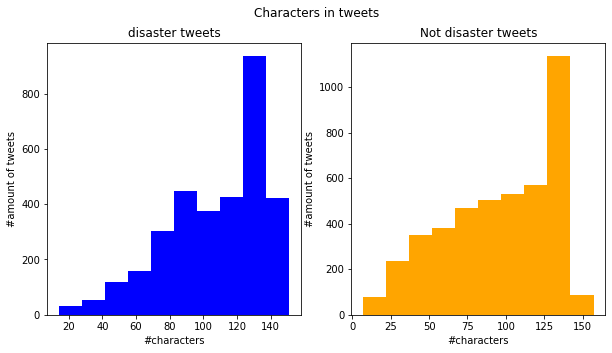

In [26]:
#lets check the lenghts side by side

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_df[train_df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
ax1.set_ylabel('#amount of tweets')
ax1.set_xlabel('#characters')
tweet_len=train_df[train_df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='orange')
ax2.set_title('Not disaster tweets')
ax2.set_ylabel('#amount of tweets')
ax2.set_xlabel('#characters')
fig.suptitle('Characters in tweets')
plt.show()

Words in disaster tweets:  49613
Words in non-disaster tweets:  63848
Words in tweets total:  113461


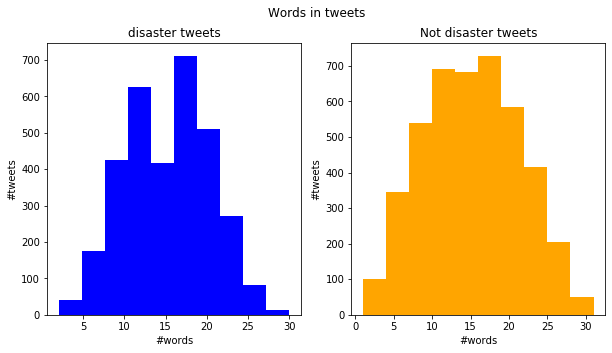

In [27]:
#number of words in disaster and non-disaster tweets. Is there a difference?

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_words=train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_words,color='blue')
ax1.set_title('disaster tweets')
ax1.set_ylabel('#tweets')
ax1.set_xlabel('#words')
print ("Words in disaster tweets: ", tweet_words.sum())
total = tweet_words.sum()

tweet_words=train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_words,color='orange')
ax2.set_title('Not disaster tweets')
ax2.set_ylabel('#tweets')
ax2.set_xlabel('#words')
fig.suptitle('Words in tweets')
total += tweet_words.sum()
print ("Words in non-disaster tweets: ", tweet_words.sum())
print ("Words in tweets total: ", total)

plt.show()
#xxxx



In [28]:
#lets analyze what types of words are in the tweets
def create_corpus(target):
    corpus=[]
    
    for x in train_df[train_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

def create_corpus_df(all_df, target):
    corpus=[]
    
    for x in all_df[all_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

stopwords in disaster tweets {'weren', 'didn', 'as', 'with', 'wasn', 'up', 'above', 'hadn', 'where', 'she', 'mightn', 'out', 'why', 'having', 'against', 'all', 'then', "mustn't", 'some', 'between', 'herself', 'does', 'will', 'couldn', 'these', "shouldn't", 'than', 'yours', 'him', 'll', "she's", "you're", 'over', "hadn't", 'yourself', 'few', 'did', 'has', 'are', 'should', 't', 'its', 'but', 'other', 'ain', 'themselves', 'only', 'haven', "weren't", 'below', 'during', 'there', 'through', 'on', 'such', 'ourselves', 'yourselves', 'o', 'we', 'they', 'what', "isn't", 'before', 'be', 'a', 'how', "wouldn't", 'y', 'to', "hasn't", 'won', "haven't", 'who', 'is', 'not', 'm', 'been', 'now', "mightn't", 'was', 'mustn', 'that', 'them', 'or', "you'd", 'both', 'your', 'own', 'those', 'do', 'their', 'of', 'very', 'most', 'into', 'more', 'himself', 'each', 'down', 're', 'hers', 'me', 'for', 'whom', 'until', 'doesn', 'shan', 'no', 'it', 'i', "should've", 'isn', "you'll", 'from', "it's", "couldn't", 've', "

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marttiylikoski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


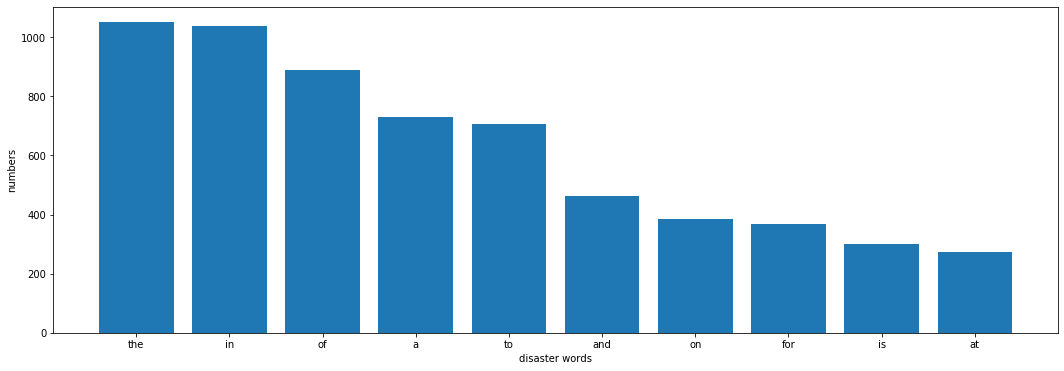

stopwords in non-disaster tweets {'weren', 'didn', 'as', 'with', 'wasn', 'up', 'above', 'hadn', 'where', 'she', 'mightn', 'out', 'why', 'having', 'against', 'all', 'then', "mustn't", 'some', 'between', 'herself', 'does', 'will', 'couldn', 'these', "shouldn't", 'than', 'yours', 'him', 'll', "she's", "you're", 'over', "hadn't", 'yourself', 'few', 'did', 'has', 'are', 'should', 't', 'its', 'but', 'other', 'ain', 'themselves', 'only', 'haven', "weren't", 'below', 'during', 'there', 'through', 'on', 'such', 'ourselves', 'yourselves', 'o', 'we', 'they', 'what', "isn't", 'before', 'be', 'a', 'how', "wouldn't", 'y', 'to', "hasn't", 'won', "haven't", 'who', 'is', 'not', 'm', 'been', 'now', "mightn't", 'was', 'mustn', 'that', 'them', 'or', "you'd", 'both', 'your', 'own', 'those', 'do', 'their', 'of', 'very', 'most', 'into', 'more', 'himself', 'each', 'down', 're', 'hers', 'me', 'for', 'whom', 'until', 'doesn', 'shan', 'no', 'it', 'i', "should've", 'isn', "you'll", 'from', "it's", "couldn't", 've

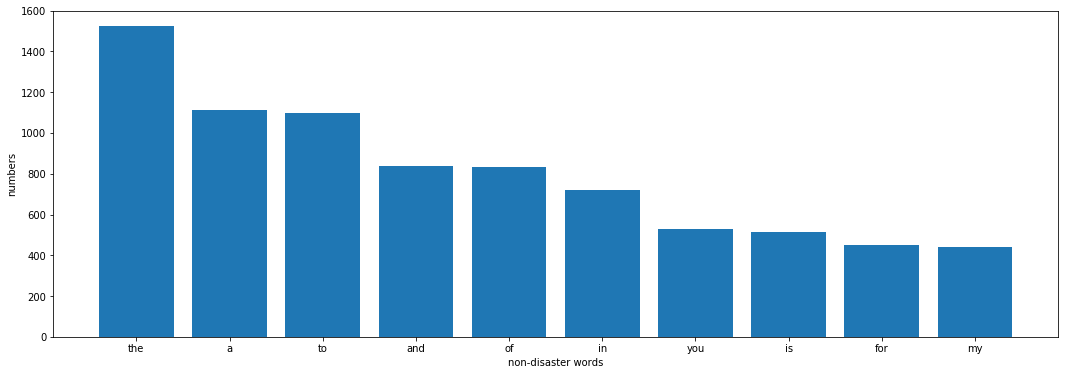

In [29]:
#look at stopwords in the tweets

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import defaultdict
from collections import Counter

stop=set(stopwords.words('english'))

def stopword_analysis(corpus, explanation, xlab, ylab="numbers"):
    corpus=create_corpus(corpus)
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
        
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    print (explanation,np.array(stop))

    plt.rcParams['figure.figsize'] = (18.0, 6.0)
    x,y=zip(*top)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.bar(x,y)
    plt.show()

stopword_analysis(1, "stopwords in disaster tweets", "disaster words")
stopword_analysis(0, "stopwords in non-disaster tweets", "non-disaster words")


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


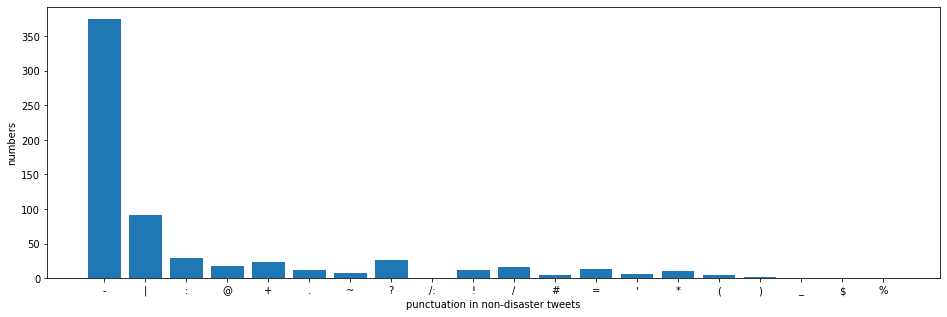

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


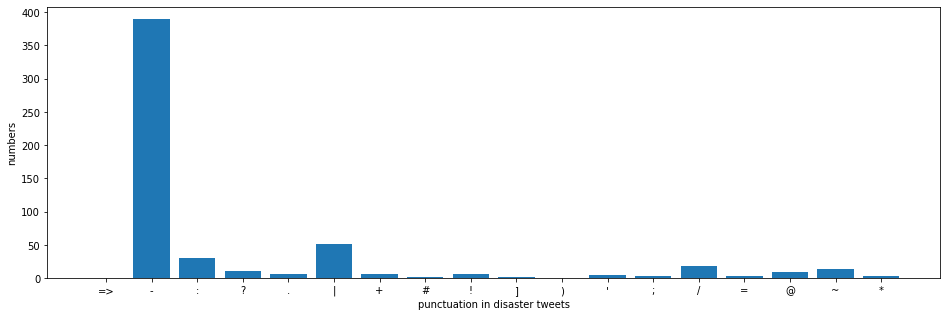

In [30]:
#lets check how much there are punctuations
import string
def show_punctuations(corpus, xlab, ylab="numbers"):
    plt.figure(figsize=(16,5))
    corpus=create_corpus(corpus)

    dic=defaultdict(int)
    special = string.punctuation
    print(special)
    for i in (corpus):
        if i in special:
            dic[i]+=1
        
    x,y=zip(*dic.items())
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.bar(x,y)
    plt.show()
    
show_punctuations(0,"punctuation in non-disaster tweets")
show_punctuations(1,"punctuation in disaster tweets")


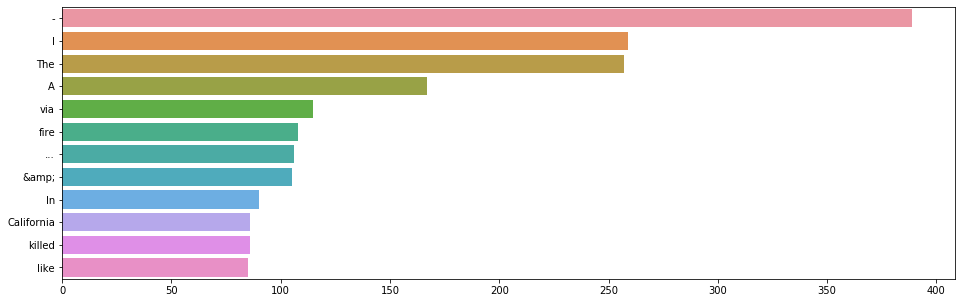

In [31]:
#what are the common words in disaster tweets
import seaborn as sns
plt.figure(figsize=(16,5))
corpus=create_corpus(1)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)
#seems there is lots stopwords and some punctuations that do not help in text categorization

In [32]:
%run DataClenser.ipynb


In [33]:
# lets add all tweets (train and test) together and see how clensing changes it
all_df=pd.concat([train_df,test_df])
all_df.shape


/Users/marttiylikoski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(10876, 6)

In [34]:
print(all_df.columns)
all_df['text'] = all_df['text'].apply(lambda x: text_clense(x))

print (all_df.text[1])

Index(['id', 'keyword', 'length', 'location', 'target', 'text'], dtype='object')
1                forest fire near la ronge sask canada
1    heard about earthquake is different cities sta...
Name: text, dtype: object


wordcloud for disaster tweets
46269
['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', 'earthquake', 'may', 'allah']


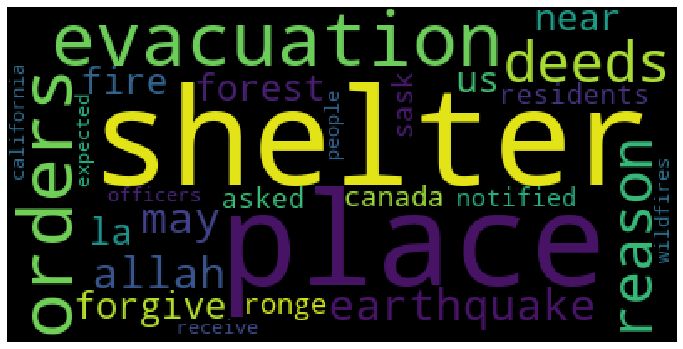

wordcloud for other tweets
60478
['whats', 'up', 'man', 'i', 'love', 'fruits', 'summer', 'is', 'lovely', 'my']


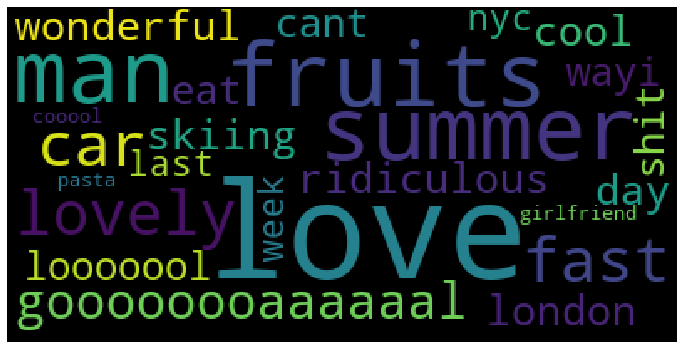

sum of disaster words 46269
sum of other words 60478
total words 106747


In [48]:
# lets check what are common words in disaster tweets in clensed data
from wordcloud import WordCloud

def tweet_word_cloud (all_df, target):
    corpus_new=create_corpus_df(all_df,target)
    print (len(corpus_new))
    print (corpus_new[:10])
    # Generating the wordcloud with the values under the category dataframe
    plt.figure(figsize=(12,8))
    word_cloud = WordCloud(
        background_color='black',
        max_font_size = 80).generate(" ".join(corpus_new[:50]))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

print ("wordcloud for disaster tweets")
tweet_word_cloud(all_df,1)

print ("wordcloud for other tweets")
tweet_word_cloud(all_df,0)

#xxx

corpus=create_corpus_df(all_df, 1)
dic=defaultdict(int)
for word in corpus:
    dic[word]+=1

disaster_tw=sum(dic.values())
print ("sum of disaster words", disaster_tw)

corpus=create_corpus_df(all_df, 0)
dic=defaultdict(int)
for word in corpus:
    dic[word]+=1
    
other_tw = sum(dic.values())
print ("sum of other words", other_tw)

print ("total words", disaster_tw+other_tw)

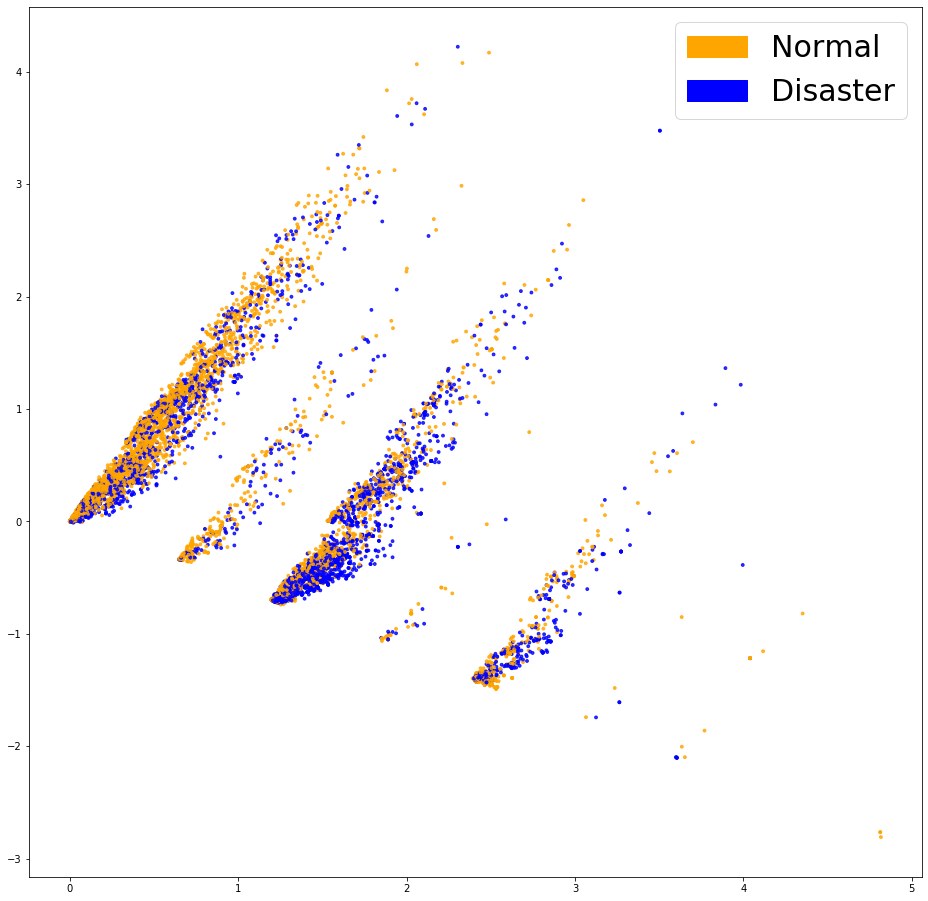

In [31]:
# lets see if there is structure in the data as such
#tsekataan miten hyvin tää meni
from sklearn.feature_extraction.text import CountVectorizer 
count_vectorizer = feature_extraction.text.CountVectorizer()

#train_df = pd.read_csv("train.csv")
#test_df = pd.read_csv("test.csv")
#train_df['target']==1]

# create bag of words vectors
train_vectors = count_vectorizer.fit_transform(train_df["text"])
test_vectors = count_vectorizer.transform(test_df["text"])

#load the plotting library
%run DataHelpers.ipynb

fig = plt.figure(figsize=(16, 16))          
plot_LSA(train_vectors, train_df['target'])
plt.show()
#print (train_df['target'].shape)
#print (train_vectors.shape)
